**Question 11**: Pinball scattering is a purely Newtonian equations of motion exercise without feedback or random numbers but showing chaotic behaviour regardless.
​
Consider the potential $$V(x,y)=x^{2}\,y^{2}\,e^{-\left(x^{2}+y^{2}\right)}$$ (all terms dimensionless) with four maxima centred at $x=\pm{}1$ and $y=\pm{}1$, respectively. It is defined as a repulsive potential for any test particle (the pinball) moving through that potential. The equations of motion to solve hence are $$\frac{d^{2}x(t)}{dt^{2}} = -2.0\,y^{2}\,x\,(1-x^{2})\,e^{-\left(x^{2}+y^{2}\right)}$$ and $$\frac{d^{2}y(t)}{dt^{2}} = -2.0\,x^{2}\,y\,(1-y^{2})\,e^{-\left(x^{2}+y^{2}\right)}.$$
​
**Task**: Solve these two coupled ODE's in stages: 
​
**(a)** write a function `trajectory(impactpar, speed)` which takes the impact parameter, $x(0)$, as input as well as the speed $v_{y}$ for initial conditions (impact parameter$=x(0)$, $v_{x}=\frac{dx(0)}{dt}$, $y(0)$ and $v_{y}=\frac{dy(0)}{dt}$ in that order). Calculate the time array to solve for from `np.linspace(0,maxtime,300)` where `maxtime` works well as `10 / speed`. The function shall return the trajectory, i.e. the arrays of solved x(t) and y(t) separately. **Plot** a trajectory of your choice, see below, with appropriate axes labels.
​
As initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$ (away from the potential in $y$). The range of sensible initial values for $x(0)$, should be between $-0.9\leq{}x(0)\leq{}0.9$ but values around $0.1-0.2$ are quite interesting to observe. Likewise, pick a kinetic energy in form of an initial speed $0<v_{y}=\frac{dy(0)}{dt}\leq{}0.5$.
​
**(b)** Write a function `scatterangles(allb, speed)` which takes an array of impact parameter from the interval $[-0.2, 0.2]$ with a step size of 0.001 as input as well as a speed value. Loop over the impact parameter values, solve the ODE's and determine the scatter angle. Again, as initial values, fix $v_{x}=\frac{dx(0)}{dt}=0.0$ and $y(0)=-2$. Fix the speed input value at $v_{y}=0.1$ when calling the `scatterangles(allb, speed)` function before plotting the result, see below.
​
That scatter angle is determined from the final value of velocity components, i.e. $\theta=\tan^{-1}(v_{y}/v_{x})$ at the maximum time value. **Plot** the scatter angle as a function of impact parameter.

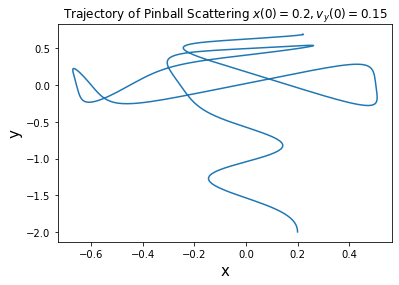

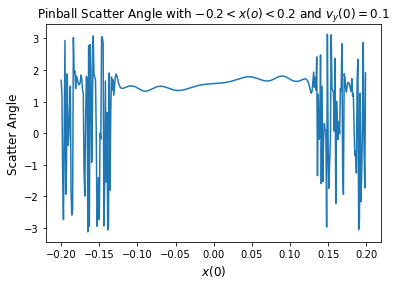

In [1]:
'''Modelling pinball scattering'''
# Solution to part (a)
# YOUR CODE HERE
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def solve(t, vals):
    '''Solving the equations of motion'''
    _=t #unused
    x = vals[0]
    vx = vals[1]
    y = vals[2]
    vy = vals[3]
    dvx = -2*(y**2)*x*(1-(x**2))*np.exp(-((x**2)+(y**2)))
    dvy = -2*(x**2)*y*(1-(y**2))*np.exp(-((x**2)+(y**2)))
    return[vx, dvx, vy, dvy]

def trajectory(impactpar, speed):
    '''Returns the trajectory arrays of the pinball in x and y direction'''
    t = np.linspace(0, 10/speed, 300)
    sol = solve_ivp(fun=solve, t_span=[t[0], t[-1]], y0=[impactpar, 0, -2, speed], t_eval=t)
    return sol.y[0], sol.y[2]

X, Y = trajectory(0.2, 0.15)
plt.plot(X, Y)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.title('Trajectory of Pinball Scattering $x(0)=0.2, v_y(0)=0.15$')
plt.show()

# Solution to part (b)
# YOUR CODE HERE
def scatterangles(allb, speed):
    '''Returns the scatter angle subject to an array of impact parameters
    and a speed'''
    t = np.linspace(0, 10/speed, 300)
    sa = np.zeros(len(allb))
    for count, values in enumerate(allb):
        sol = solve_ivp(solve, t_span=[t[0], t[-1]], y0=[values, 0, -2, speed], t_eval=t)
        my_vx = sol.y[1]
        my_vy = sol.y[3]
        sa[count] = math.atan2(my_vy[-1], my_vx[-1])
    return sa

impactpar_array = np.arange(-0.2, 0.2, 0.001)
my_scatterangle = scatterangles(impactpar_array, 0.1)
plt.plot(impactpar_array, my_scatterangle)
plt.title('Pinball Scatter Angle with $-0.2<x(o)<0.2$ and $v_y(0)=0.1$')
plt.xlabel('$x(0)$', size=12)
plt.ylabel('Scatter Angle', size=12)
plt.show()


In [ ]:
# Test cell
speed = 0.1
b = 0.15
xoft, yoft = trajectory(b, speed)
assert (xoft[1]>0.145 and xoft[1]<0.149), 'wrong x(t)'
assert (yoft[1]>-1.97 and yoft[1]<-1.96), 'wrong y(t)'